<a href="https://colab.research.google.com/github/sunshineluyao/CV_ML/blob/master/Data2020/BTC_AutomatedTrading_LSMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Object-Oriented Programming in Python: State and Behavior](https://campus.datacamp.com/courses/object-oriented-programming-in-python)

# Define Class Functions

In [11]:
import pandas as pd
import numpy as np
class LSMA:
  def __init__(self, short_window, long_window, Start_date):
    self.short = short_window
    self.long = long_window
    self.start = Start_date
  def signals(self, URL):
    import pandas as pd 
    import numpy as np
    data=pd.read_csv(URL,index_col='Unnamed: 0')
    data.index=pd.to_datetime(data.index)
    data = data[data.index>=self.start]
    signals = pd.DataFrame(index=data.index)
    signals['signal'] = 0.0
    signals['short_mavg'] = data['PriceUSD'].rolling(window=self.short, min_periods=1, center=False).mean()
    signals['long_mavg'] = data['PriceUSD'].rolling(window=self.long, min_periods=1, center=False).mean()
    signals['PriceUSD'] = data['PriceUSD']
    signals['signal'] = np.where(signals['short_mavg']> signals['long_mavg'], 1.0, 0.0) 
    signals['positions'] = signals['signal'].diff()
    signals=signals.dropna()
    return signals

  def signal_figure(self,signals):
    # Plot the buy signals
    import matplotlib.pyplot as plt
    fig, ax1 =plt.subplots()
    ax1.plot(signals.loc[signals.positions == 1.0].index, signals.short_mavg[signals.positions == 1.0], '^', markersize=20, color='green')
         # Plot the sell signals
    ax1.plot(signals.loc[signals.positions == -1.0].index, signals.short_mavg[signals.positions == -1.0],'v', markersize=20, color='red')
    ax1=signals['short_mavg'].plot(ax=ax1, color='blue', lw=2.,figsize=(14, 10),legend=True)
    ax1=signals['long_mavg'].plot(ax=ax1, color='black', lw=2.,figsize=(14, 10),legend=True) 
    return

  def portfoio(self,initial_capital, volume,signals):
      positions = pd.DataFrame(index=signals.index).fillna(0.0)
      positions['Q'] = volume*signals['signal'] 
      portfolio = positions.multiply(signals['PriceUSD'], axis=0) 
      pos_diff = positions.diff()
      portfolio['holdings'] = positions.multiply(signals['PriceUSD'],axis=0)
      portfolio['cash'] = initial_capital - (pos_diff.multiply(signals['PriceUSD'], axis=0)).cumsum()-((pos_diff.multiply(signals['PriceUSD'], axis=0)).abs()*0.001).cumsum()
      portfolio['total'] = portfolio['cash'] + portfolio['holdings']
      return portfolio
  def portfolio_figure(self,portfolio):
    import matplotlib.pyplot as plt
    plt.style.use('seaborn-bright')
    portfolio[['holdings', 'cash', 'total']].plot(figsize=(14, 10),legend=True)
  def ROI(self, portfolio):
    ROI = portfolio['total'].iloc[-1]/initial_capital-1
    return ROI

# Generate result by defining parameters

### please provide the URL of the data

In [6]:
URL = 'https://raw.githubusercontent.com/sunshineluyao/CVML2021/main/BTC_2020_12_31.csv'

### please define the short and long window

In [12]:
LSMA= LSMA(short_window=60,long_window=180,Start_date="2013-12-27")

### print the signal table and figure

In [13]:
signals=LSMA.signals(URL)
signals.head()

,signal,short_mavg,long_mavg,PriceUSD,positions
2013-12-28,0.0,719.211465,719.211465,715.852363,0.0
2013-12-29,0.0,721.898049,721.898049,727.271216,0.0
2013-12-30,0.0,725.359036,725.359036,735.741997,0.0
2013-12-31,0.0,726.198745,726.198745,729.557583,0.0
2014-01-01,0.0,730.566379,730.566379,752.404550,0.0


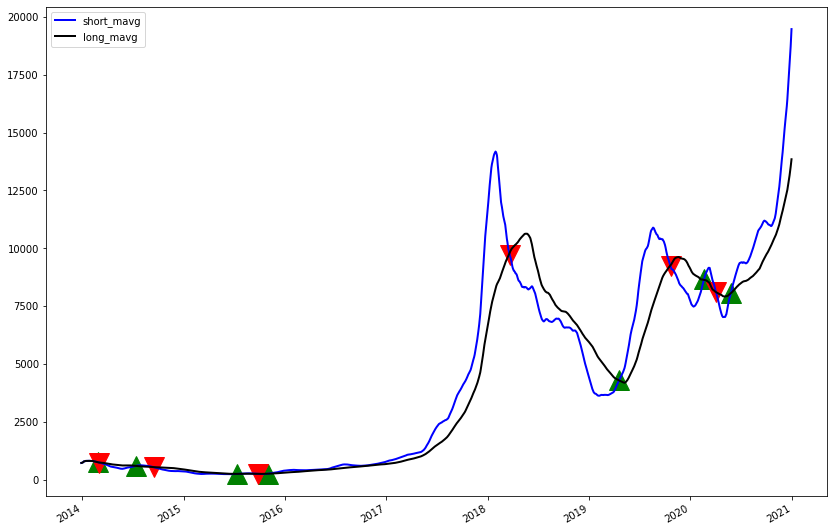

In [14]:
LSMA.signal_figure(signals)

### Simulate and virtualize portfolio return 

In [15]:
### please provide the initial capital and the bitcoin to buy and sell each time
initial_capital = 100000
volume =100
portfolio=LSMA.portfoio(initial_capital, volume,signals)
portfolio.head()

,Q,holdings,cash,total
2013-12-28,0.0,0.0,NaN,NaN
2013-12-29,0.0,0.0,100000.0,100000.0
2013-12-30,0.0,0.0,100000.0,100000.0
2013-12-31,0.0,0.0,100000.0,100000.0
2014-01-01,0.0,0.0,100000.0,100000.0


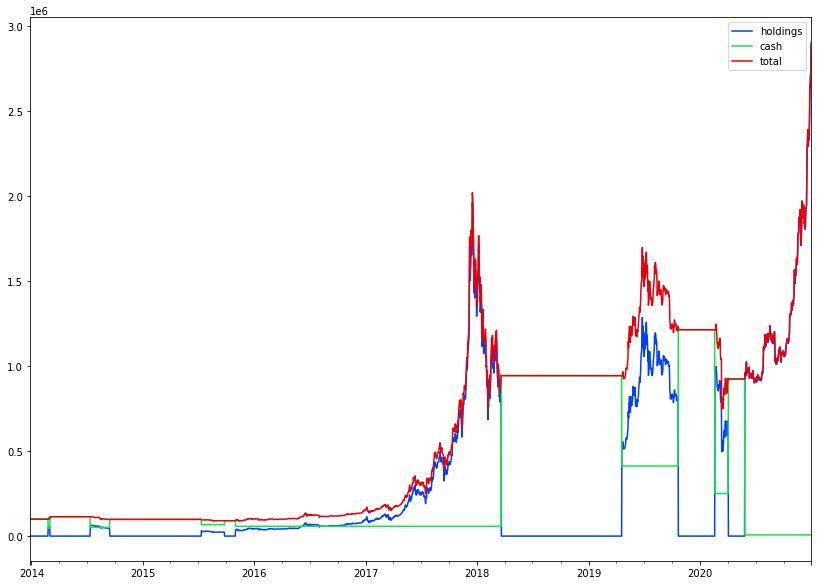

In [16]:
LSMA.portfolio_figure(portfolio)

In [17]:
LSMA.ROI(portfolio)

28.092205860555513